In [2]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.pipelines.controlnet.pipeline_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

import os

In [3]:
# load controlnet and stable diffusion v1-5-inpainting
base_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-openpose",
    torch_dtype=torch.float16
)

controlnet = ControlNetModel.from_pretrained(
    "models/cn_pose",
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetInpaintPipeline.from_single_file(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    # "SG161222/Realistic_Vision_V3.0_VAE",
    # "runwayml/stable-diffusion-inpainting",
    # "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

base_pipe = StableDiffusionControlNetInpaintPipeline.from_single_file(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    # "SG161222/Realistic_Vision_V3.0_VAE",
    # "runwayml/stable-diffusion-inpainting",
    # "runwayml/stable-diffusion-v1-5",
    controlnet=base_controlnet,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")
base_pipe = base_pipe.to("cuda")

C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that 

In [4]:
from controlnet_aux.processor import Processor

# options are:
# ["canny", "depth_leres", "depth_leres++", "depth_midas", "depth_zoe", "lineart_anime",
#  "lineart_coarse", "lineart_realistic", "mediapipe_face", "mlsd", "normal_bae", "normal_midas",
#  "openpose", "openpose_face", "openpose_faceonly", "openpose_full", "openpose_hand",
#  "scribble_hed, "scribble_pidinet", "shuffle", "softedge_hed", "softedge_hedsafe",
#  "softedge_pidinet", "softedge_pidsafe", "dwpose"]

def controlnet_condition(img, processor_id):
    processor = Processor(processor_id)

    processed_image = processor(img, to_pil=True)
    return processed_image

c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\mediapipe_face\mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflic

In [49]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [29]:
text_prompt = "high quality detailed photograph of a woman standing in black blouse"
negative_prompt = "poor quality, bad, worst, unnatural, patched, cropped, flat, unrealistic, fade, Disfigured, cartoon, blurry, nude"

In [123]:
new_size = (512, 512)
n = 15

In [131]:
image = load_image(f"C:/Users/tabatabaei/Desktop/pose test data/image/00145_00_00145_00.png").resize(new_size)

In [132]:
mask_image = load_image(f"C:/Users/tabatabaei/Desktop/pose test data/mask/00145_00_00145_00.png").resize(new_size)

In [133]:
pose_image = load_image(f"C:/Users/tabatabaei/Desktop/pose test data/pose/00145_00_rendered.png").resize(new_size)


# pose_image = controlnet_condition(
#     load_image(f"C:/Users/tabatabaei/Desktop/pose test data/flawless/{n}.jpg").resize(new_size), 
#     "openpose_full"
# )
# pose_image

In [142]:
generator = torch.manual_seed(5)

results = []
for scale in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:

    generated_image = pipe(
        text_prompt,
        image=image,
        mask_image=mask_image,
        control_image=pose_image,
        num_inference_steps=20,
        generator=generator,
        controlnet_conditioning_scale = scale,
        width=384, height=512
    ).images[0]

    results.append(generated_image)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

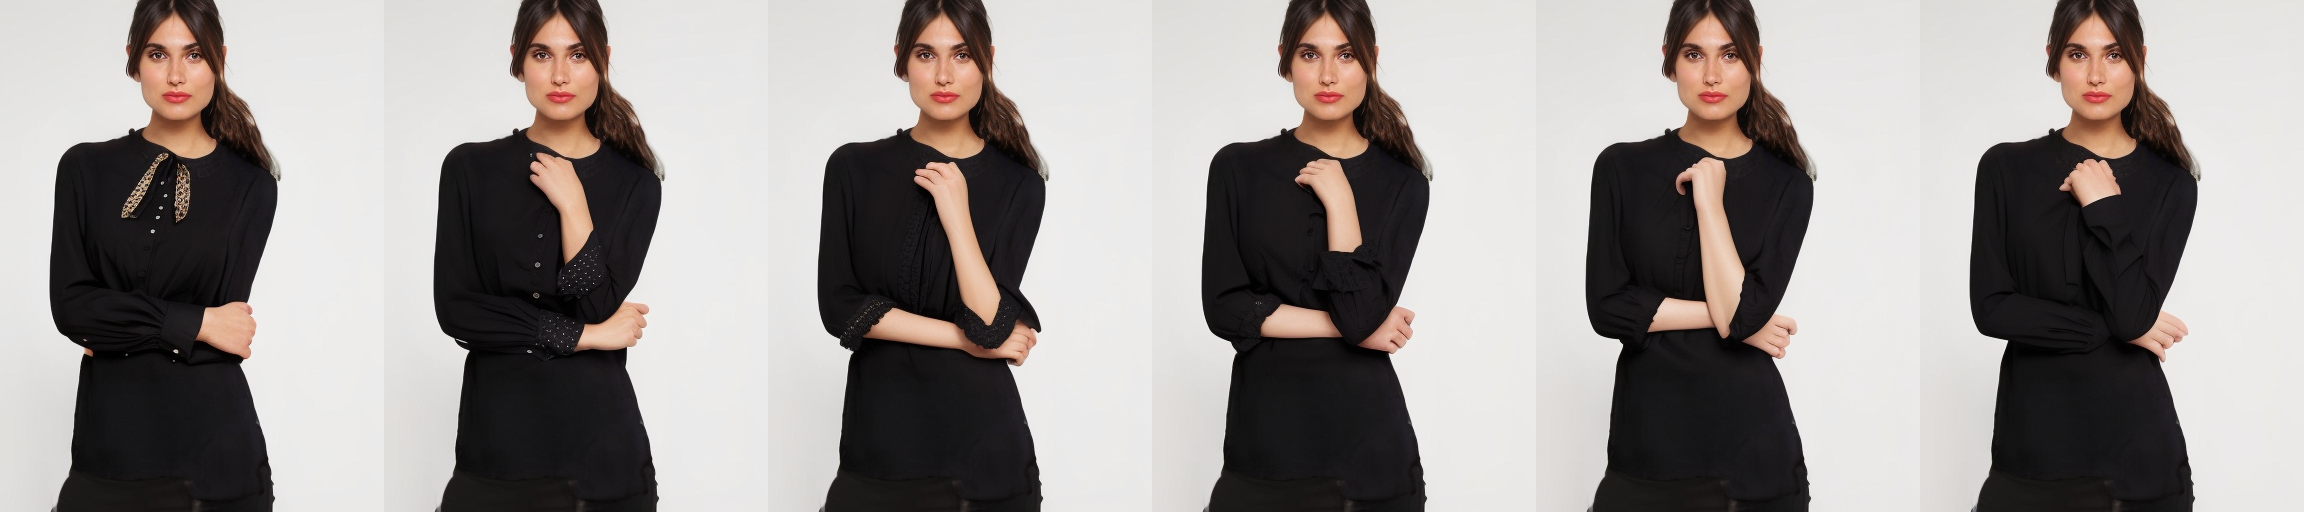

In [143]:
grid = image_grid(results,  1, 6)
grid

  0%|          | 0/20 [00:00<?, ?it/s]

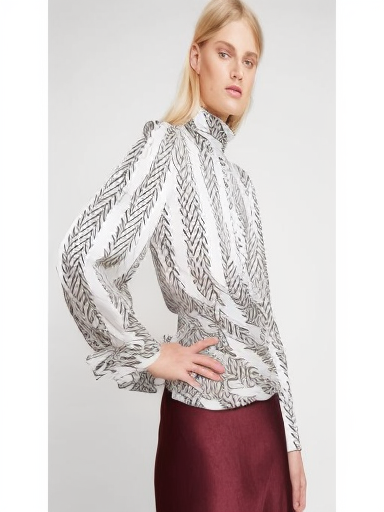

In [114]:
generated_image = pipe(
    text_prompt,
    image=image,
    mask_image=mask_image,
    control_image=pose_image,
    num_inference_steps=20,
    generator=generator,
    controlnet_conditioning_scale = 1.0,
    width=384, height=512
).images[0]

generated_image